<i>General instructions for this and future notebooks:</i> 
1. To run a cell and move to the next cell: Hold down <strong>Shift</strong> and press <strong>Enter</strong>
2. To run a cell and stay in the same cell: Hold down <b>Ctrl</b> and press <b>Enter</b>
3. Use the arrow up and down to navigate or do it manually as you prefer
4. Escape from typing a cell: Hit <b>Esc</b>

---------


#New Jersey Institue of Technology
#CS 675: Machine Learning, Spring 2021
#Assignment 1
Date: 02/04/2022
Due: 02/21/2022, 11:59pm EST

Total possible points: 30.

Submit your solution on CANVAS. 






The first assignment walks you through some elements of Python/Numpy. It is meant mostly to familiarize you with Jypyter notebooks. It also lets you to load and explore a data set. 
Write code in the cells below each task. 



-----------------------

In [ ]:
import numpy as np
from numpy import array
from numpy import matmul
from numpy.linalg import inv
from numpy.random import rand
from scipy import stats
import matplotlib.pyplot as plt


-----

# Part 1: Linear Regression



---


## Task 1 **(10 points)**
Linear regression. The code below creates a random scattering of datapoints around a line. 
1. Use the normal equations to compute a line which has the best fit to all points 
in the least-quares sense. **(5 points)**
2. Next, plot the fitted line and the data points. **(5 points)**


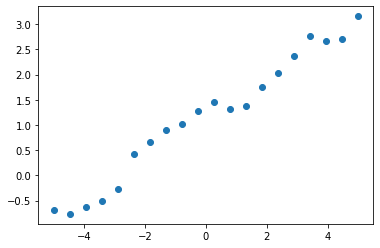

In [ ]:
# generate data on a line perturbed with some noise
noise_margin= 0.76

# w[0] is random constant term (offset from origin)
# w[1] is random linear term (slope)
w = rand(2,1) 
x = np.linspace(-5,5,20)
y = w[0] + w[1]*x + noise_margin * rand(len(x))

# create the design matrix X: the x data, and add a column of ones for the constant term
X = np.column_stack( [np.ones([len(x), 1]), x.reshape(-1, 1)] )

# visualize the data
plt.scatter(x, y)
plt.show()

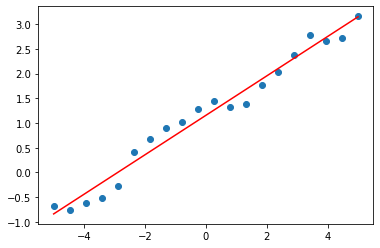

In [ ]:
# your code goes here:



-----


# Part 2: Exploring a Data Set


## Loading the data set

In [ ]:
from sklearn.datasets import load_boston
ds = load_boston()
samples, label, feature_names = ds.data, ds.target, ds.feature_names
print(samples.shape)
print(feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


In [ ]:
# Data description
print(ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# check to see if there is any null data
np.isnan(np.sum(samples))

False

In [ ]:
# set print options to make things look nicer
np.set_printoptions(suppress=True, linewidth=125)

In [ ]:
# find median, variance of the data and put it out in nice looking format
median = np.round(np.median(samples, axis=0), decimals=1)
variance = np.round(np.var(samples, axis=0), decimals=1)
basic_stats = np.vstack((median, variance))
basic_stats_label = ['  median','variance']
print('\t\tCRIM\tZN\tINDUS\tCHAS\tNOX\tRM\tAGE\tDIS\tRAD\tTAX\tPTRATIO\tB\tLSTAT')
for basic_stats_label, row in zip(basic_stats_label, basic_stats):
    print('{} [\t{}]'.format(basic_stats_label,"".join('%s\t'%i for i in row)))

		CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT
  median [	0.3	0.0	9.7	0.0	0.5	6.2	77.5	3.2	5.0	330.0	19.0	391.4	11.4	]
variance [	73.8	542.9	47.0	0.1	0.0	0.5	790.8	4.4	75.7	28348.6	4.7	8318.3	50.9	]


---
## Task 2 **(5 points)**
Use function <code>stats.describe</code> to retrieve the `max` `min` and `average` of samples then display it as in the expected output similar to the output for `median` and `variance` above). **(5 points)**
<br><br>


In [ ]:
# your code goes here:



		CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT
   min [	0.0	0.0	0.5	0.0	0.4	3.6	2.9	1.1	1.0	187.0	12.6	0.3	1.7	]
   max [	89.0	100.0	27.7	1.0	0.9	8.8	100.0	12.1	24.0	711.0	22.0	396.9	38.0	]
  mean [	3.6	11.4	11.1	0.1	0.6	6.3	68.6	3.8	9.5	408.2	18.5	356.7	12.7	]


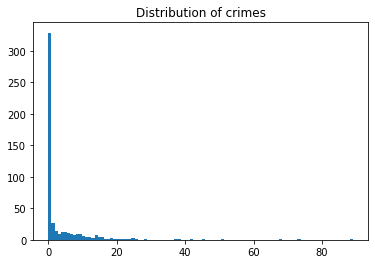

Bin sizes: [329.  26.  14.   9.  13.  12.  11.   9.   8.   9.   9.   6.   5.   4.   3.   7.   4.   4.   1.   1.   3.   1.   1.   1.
   1.   1.   1.   3.   1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   0.   0.   0.   1.   0.
   0.   0.   1.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   1.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   1.]


In [ ]:
import matplotlib.pyplot as plt

# let plot out to see what is the distribution of crime based on the data
n, bins, patches = plt.hist(samples[:,0],bins='auto')
plt.title('Distribution of crimes')
plt.show()
print('Bin sizes: {}'.format(n))




---


## Task 3 **(5 points)**

Plot out the histogram of another feature of the dataset that you are interested in, give the plot a title and also print out the bin sizes. **(5 points)** 



In [ ]:
# your code goes here:





---
## Task 4 **(10 points)**

In [ ]:
def house_with_defined_age(dataset,age):
    '''This function will return indices of all house with proportion of owner-occupied units built prior to 1940 greater than age%'''
    ids = []
    for id, record in enumerate(dataset):
        if record[6]>age:
            ids.append(id)
    return ids

    
# list out all records with unites built prior to 1940 greater than 50%
samples[house_with_defined_age(samples,50)]


**(10 points)**

Write a function that: 
* takes as input a given dataset and two numbers $a$ and $b$. 
* returns the ids of houses that tax is either less than $a$ or more than $b$. 

Demonstrate how the function runs with two specific inputs $a$ and $b$ of your choice. 




In [ ]:
# your code goes here






array([[  0.00632,  18.     ,   2.31   , ...,  15.3    , 396.9    ,   4.98   ],
       [  0.02731,   0.     ,   7.07   , ...,  17.8    , 396.9    ,   9.14   ],
       [  0.02729,   0.     ,   7.07   , ...,  17.8    , 392.83   ,   4.03   ],
       ...,
       [  0.06076,   0.     ,  11.93   , ...,  21.     , 396.9    ,   5.64   ],
       [  0.10959,   0.     ,  11.93   , ...,  21.     , 393.45   ,   6.48   ],
       [  0.04741,   0.     ,  11.93   , ...,  21.     , 396.9    ,   7.88   ]])